In [1]:
import os, shutil
first_dataset_dir = '../datasets/train1'
second_dataset_dir = '../datasets/train2'
third_dataset_dir = '../datasets/train3'
fourth_dataset_dir = '../datasets/train4'
fifth_dataset_dir = '../datasets/train5'
test_dataset_dir = '../datasets/test'

In [2]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 32

train_ds1 = image_dataset_from_directory(first_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
# 6 + 6 % 5 + 1 = 3
train_ds2 = image_dataset_from_directory(second_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
val_ds3 = image_dataset_from_directory(third_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds4 = image_dataset_from_directory(fourth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds5 = image_dataset_from_directory(fifth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
test_ds = image_dataset_from_directory(test_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [3]:
print (type(train_ds1))
print (train_ds1.class_names)

full_train_ds = train_ds1.concatenate(train_ds2).concatenate(train_ds4).concatenate(train_ds5)

# Even if we switch datatypes back to the original
# Methods like class_names are not available
# So we keep it as "concatenated dataset" instead of "prefetch dataset"
# full_train_ds = full_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# print (full_train_ds.class_names)
print (type(full_train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
['000_airplane', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '009_truck']
<class 'tensorflow.python.data.ops.concatenate_op._ConcatenateDataset'>


In [4]:
for data_batch, labels_batch in full_train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32, 10)


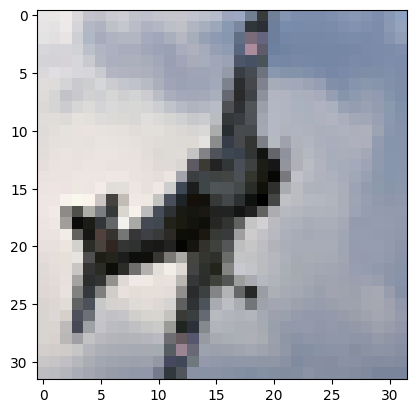

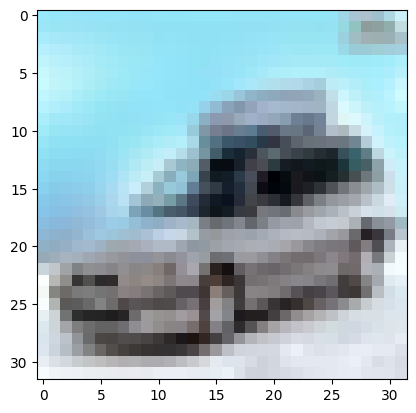

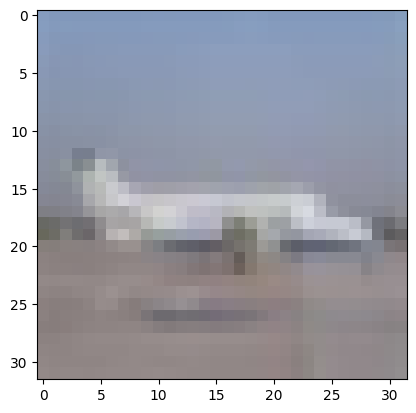

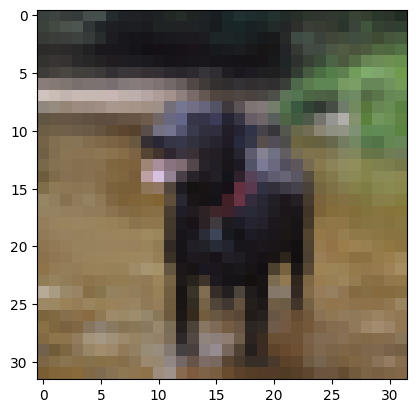

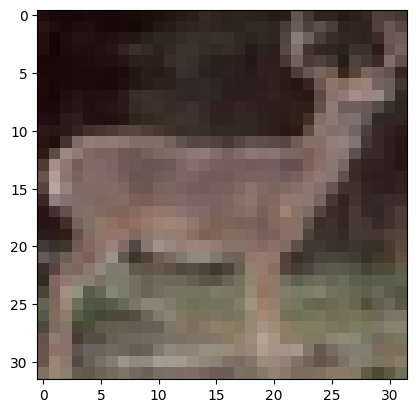

In [5]:
import matplotlib.pyplot as plt
for data_batch, _ in full_train_ds.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

DATA AUGMENTATION:

In [6]:
from tensorflow import keras 
from keras import layers
data_augmentation = keras.Sequential( 
  [
    layers.RandomFlip("horizontal"), 
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.2),
  ] 
)

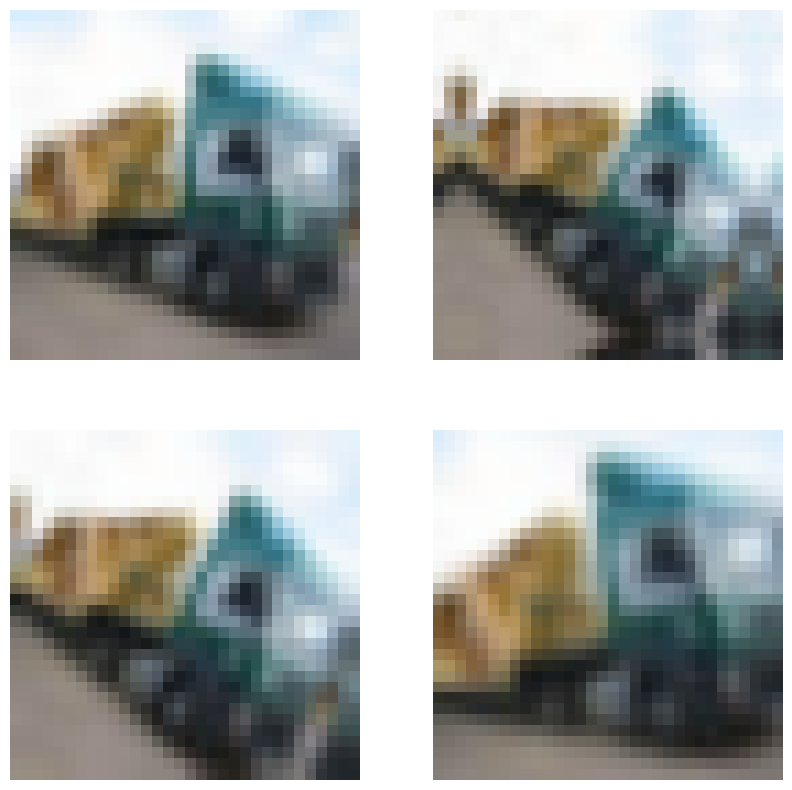

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in full_train_ds.take(1):
  for i in range(4):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1) 
    plt.imshow(augmented_images[0].numpy().astype("uint8")) 
    plt.axis("off")

In [8]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Resizing(100, 100)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
#image size too sort to add another layer
#x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
#outputs = layers.Dense(10, activation="sigmoid")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                        

TESTING DIFERENT OTIMIZERS:

1 - RMSprop

In [10]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), 
              metrics=['acc'])


In [11]:
history = model.fit(full_train_ds, 
                    epochs=30, 
                    validation_data=val_ds3)

Epoch 1/30


1252/1252 [==============================] - 23s 18ms/step - loss: 1.9941 - acc: 0.2612 - val_loss: 1.7418 - val_acc: 0.3682
Epoch 2/30
1252/1252 [==============================] - 25s 20ms/step - loss: 1.6722 - acc: 0.3866 - val_loss: 1.5553 - val_acc: 0.4370
Epoch 3/30
1252/1252 [==============================] - 26s 21ms/step - loss: 1.5452 - acc: 0.4382 - val_loss: 1.4485 - val_acc: 0.4827
Epoch 4/30
1252/1252 [==============================] - 26s 20ms/step - loss: 1.4624 - acc: 0.4715 - val_loss: 1.3718 - val_acc: 0.5104
Epoch 5/30
1252/1252 [==============================] - 25s 20ms/step - loss: 1.3998 - acc: 0.4972 - val_loss: 1.3317 - val_acc: 0.5319
Epoch 6/30
1252/1252 [==============================] - 25s 20ms/step - loss: 1.3478 - acc: 0.5175 - val_loss: 1.2833 - val_acc: 0.5478
Epoch 7/30
1252/1252 [==============================] - 25s 20ms/step - loss: 1.3042 - acc: 0.5340 - val_loss: 1.2350 - val_acc: 0.5674
Epoch 8/30
1252/1252 [==============================] - 26s

RESULTS:

With optimizer RMSdrop we got the following training metrics loss: 0.8479 - acc: 0.7034 - val_loss: 0.8741 - val_acc: 0.6949


With same params but with 100x100 images we got: loss: 0.8676 - acc: 0.6969 - val_loss: 0.8902 - val_acc: 0.6899


TESTING DIFERENT OTIMIZERS:

2 - ADAM

In [12]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=['acc'])


In [13]:
history = model.fit(full_train_ds, 
                    epochs=30, 
                    validation_data=val_ds2)

Epoch 1/30
1252/1252 [==============================] - 23s 18ms/step - loss: 1.0987 - acc: 0.6127 - val_loss: 0.9749 - val_acc: 0.6554
Epoch 2/30
1252/1252 [==============================] - 23s 18ms/step - loss: 1.0244 - acc: 0.6383 - val_loss: 0.8913 - val_acc: 0.6858
Epoch 3/30
1252/1252 [==============================] - 23s 19ms/step - loss: 0.9536 - acc: 0.6639 - val_loss: 0.8981 - val_acc: 0.6853
Epoch 4/30
1252/1252 [==============================] - 23s 18ms/step - loss: 0.8947 - acc: 0.6849 - val_loss: 0.8537 - val_acc: 0.7018
Epoch 5/30
1252/1252 [==============================] - 23s 19ms/step - loss: 0.8503 - acc: 0.7004 - val_loss: 0.8494 - val_acc: 0.7044
Epoch 6/30
1252/1252 [==============================] - 23s 18ms/step - loss: 0.8045 - acc: 0.7135 - val_loss: 0.7978 - val_acc: 0.7243
Epoch 7/30
1252/1252 [==============================] - 23s 18ms/step - loss: 0.7753 - acc: 0.7273 - val_loss: 0.7827 - val_acc: 0.7263
Epoch 8/30
1252/1252 [==========================

RESULTS for ADAM optimizer -> loss: 0.4422 - acc: 0.8424 - val_loss: 0.7703 - val_acc: 0.7485


With same params but with 100x100 images we get:
loss: 0.4606 - acc: 0.8379 - val_loss: 0.7446 - val_acc: 0.7524